In [1]:
import scanpy as sc
from scvelo.preprocessing.neighbors import get_connectivities
import anndata2pagoda
adata_all=sc.read("data/adata_aligned.h5ad")

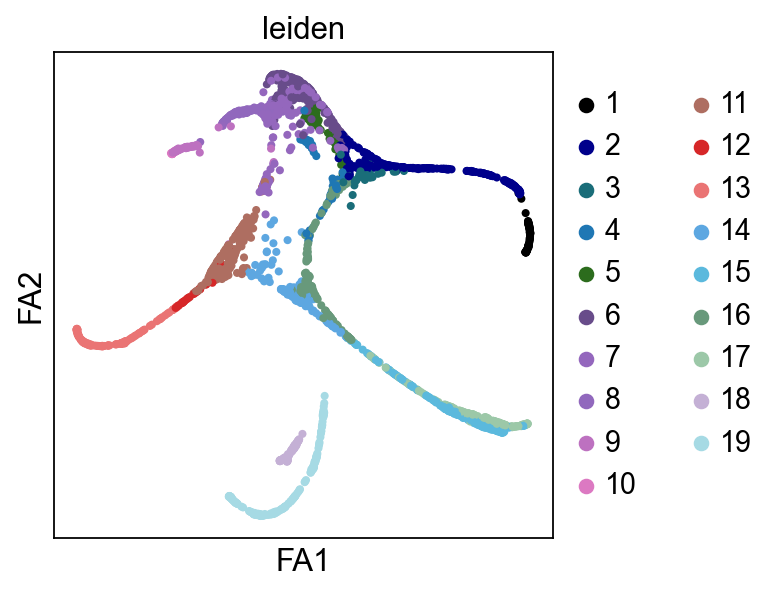

In [2]:
sc.set_figure_params()
sc.pl.draw_graph(adata_all,color="leiden")

In [3]:
adata=adata_all[adata_all.obs.leiden=="18"]

In [4]:
devtime_col=adata.uns["devtime_colors"].copy()

In [5]:
from scipy.sparse import csr_matrix
import numpy as np
adata.X=csr_matrix(np.power(10, adata.X.A)-1)

Trying to set attribute `.var` of view, copying.


Finding overdispersed features
    computing mean and variances
    gam fitting
    found 931 over-dispersed features (0:00:00) --> added 
    .var['res'], residuals of GAM fit.
    .var['lp'], p-value.
    .var['lpa'], BH adjusted p-value.
    .var['qv'], percentile of qui-squared distribution.
    .var['highly_variable'], feature is over-dispersed.



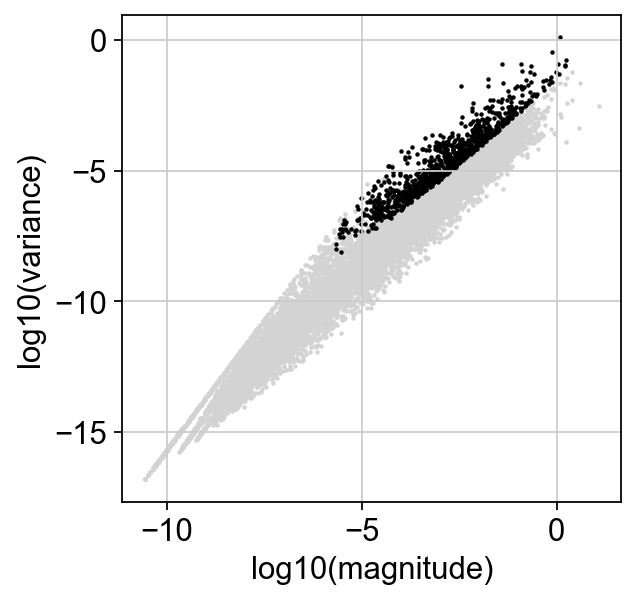

In [6]:
import scFates as scf
sc.pp.filter_genes(adata,min_cells=1)
sc.pp.normalize_total(adata, target_sum=1e3)
sc.pp.log1p(adata)
scf.pp.find_overdispersed(adata,plot=True)
adata.layers["scaled"]=sc.pp.scale(adata.X,max_value=10,copy=True)
adata.obsm["X_pca"]=sc.pp.pca(adata[:,adata.var.highly_variable].layers["scaled"])
sc.pp.neighbors(adata,n_neighbors=15,n_pcs=15,metric="cosine")

In [7]:
sc.tl.umap(adata)

In [8]:
sc.tl.leiden(adata,resolution=.5)

In [9]:
adata.obsm["X_umap"][:,0]

array([ 8.171508 ,  7.952639 , 23.969019 , 25.902617 , 21.92293  ,
       22.02343  , 23.051907 ,  8.692716 , 23.603138 , 13.582095 ,
       25.672302 , 11.898755 , 13.3377905, 14.046446 , 23.950676 ,
        8.2998085,  7.7019053, 22.962866 , 13.598074 , 24.165895 ,
       21.696936 , 25.420662 , 24.382622 ,  9.266992 , 22.962168 ,
        7.7127347,  7.2068353, 22.351242 , 13.360791 ,  7.567578 ,
        8.549452 , 14.29955  ,  9.826929 ,  7.320856 , 22.397034 ,
       11.798966 , 14.342653 ,  7.560146 , 23.045647 , 12.2493925,
       12.076659 , 25.443611 , 14.405665 , 11.546697 ,  9.482076 ,
       25.083408 , 10.5985365, 10.172942 , 24.176743 , 24.077864 ,
       10.337874 ,  8.589527 ,  7.9327865, 13.8730955, 25.474817 ,
       25.152061 ,  8.174107 , 12.374268 , 23.723095 , 24.702175 ,
       24.81044  , 22.667566 , 11.28136  , 22.405813 , 12.5536175,
       10.988728 , 10.036738 ,  8.482101 , 12.662582 , 23.136343 ,
       22.662884 , 22.651    , 12.738027 , 24.782043 ,  8.9895

In [10]:
adata.obsm["X_umap"][:,0]=-adata.obsm["X_umap"][:,0]

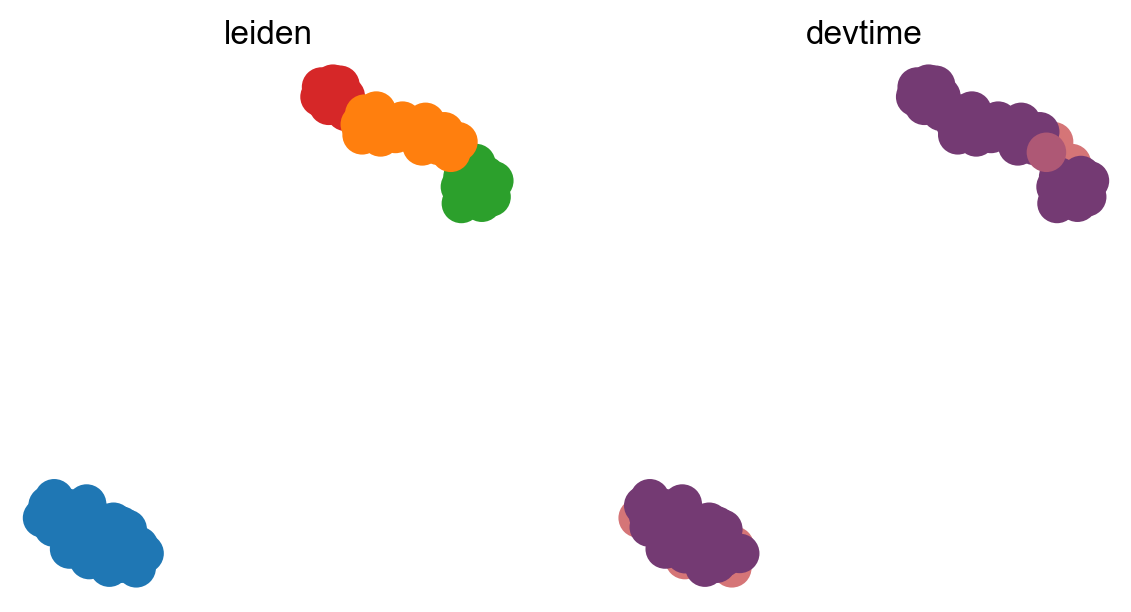

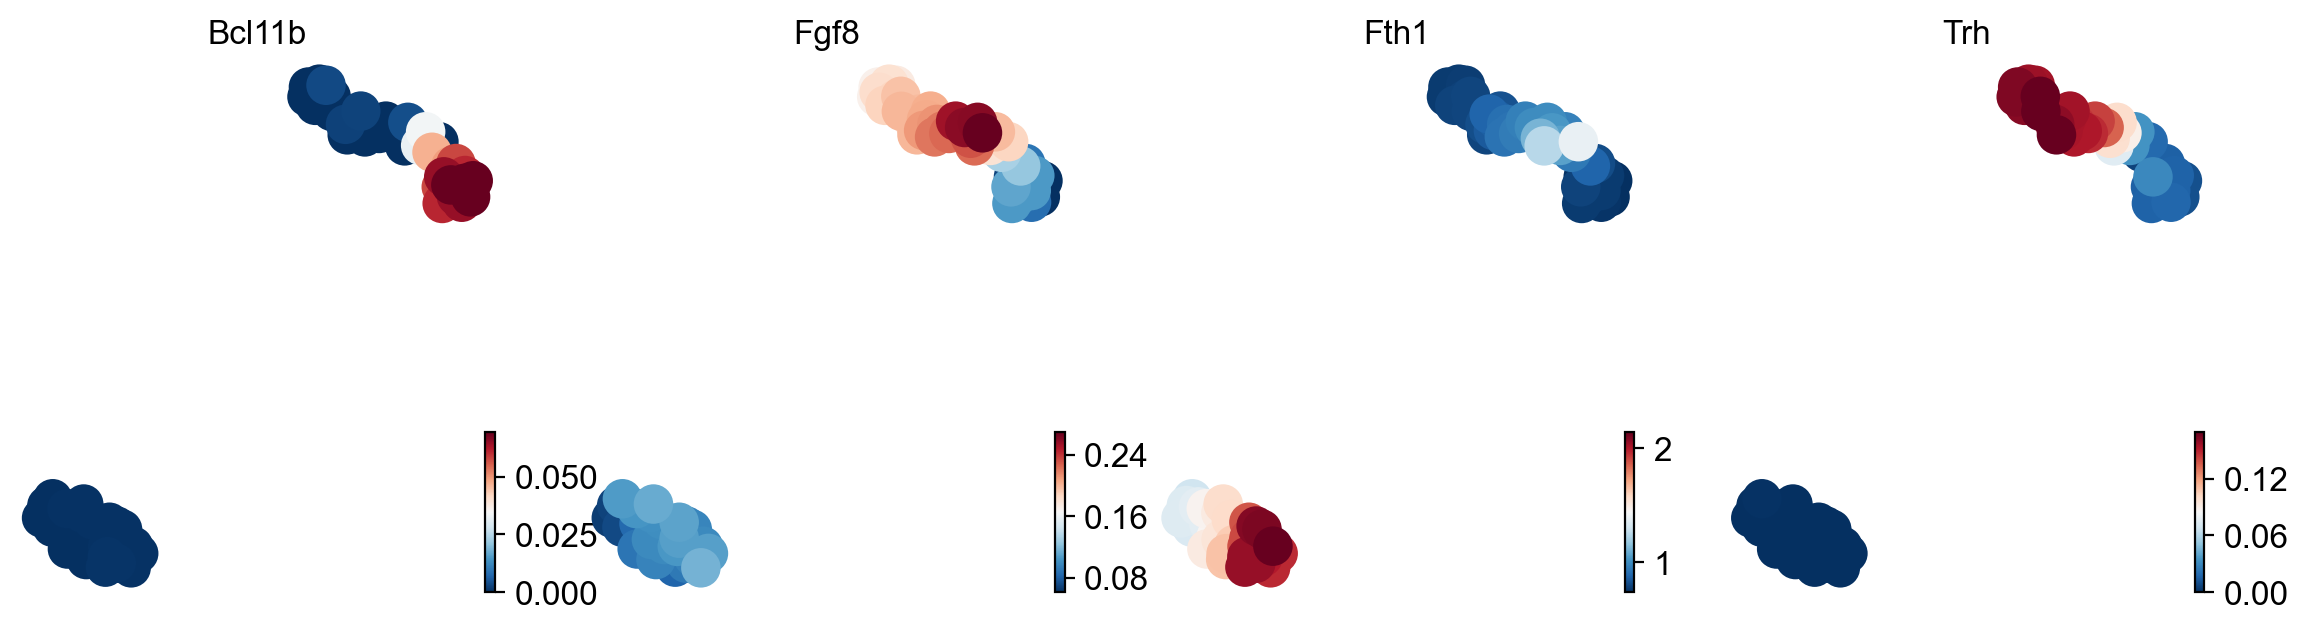

In [11]:
import scvelo as scv
scv.set_figure_params(figsize=(3.5,3.5))
scv.pl.umap(adata,color=["leiden","devtime"])

scv.pl.umap(adata, color=['Bcl11b','Fgf8','Fth1',"Trh"],smooth=True)

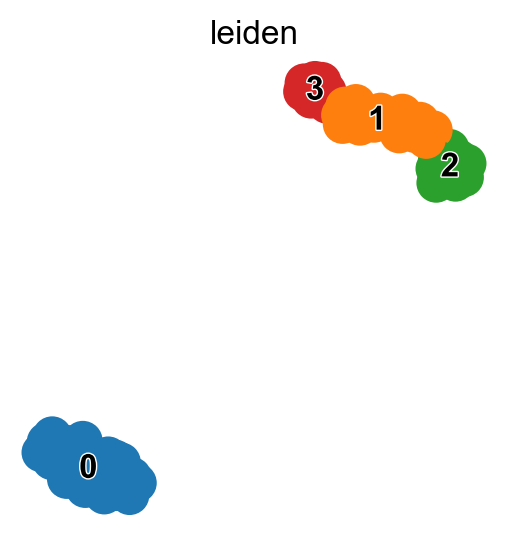

In [12]:
scv.set_figure_params(figsize=(3,3))
scv.pl.umap(adata,color=["leiden"],legend_loc="on data",smooth=True)

In [13]:
Vestibular=["Prr15","Skor1","Pcdh20","Dnah5","Gpr133"]
Cochlear=["Gata3","Calb1","Strip2","Endod1","Kcnj13"]

In [14]:
scv.set_figure_params(figsize=(3,3))

In [15]:
scf.set_figure_pubready()
import matplotlib.pyplot as plt

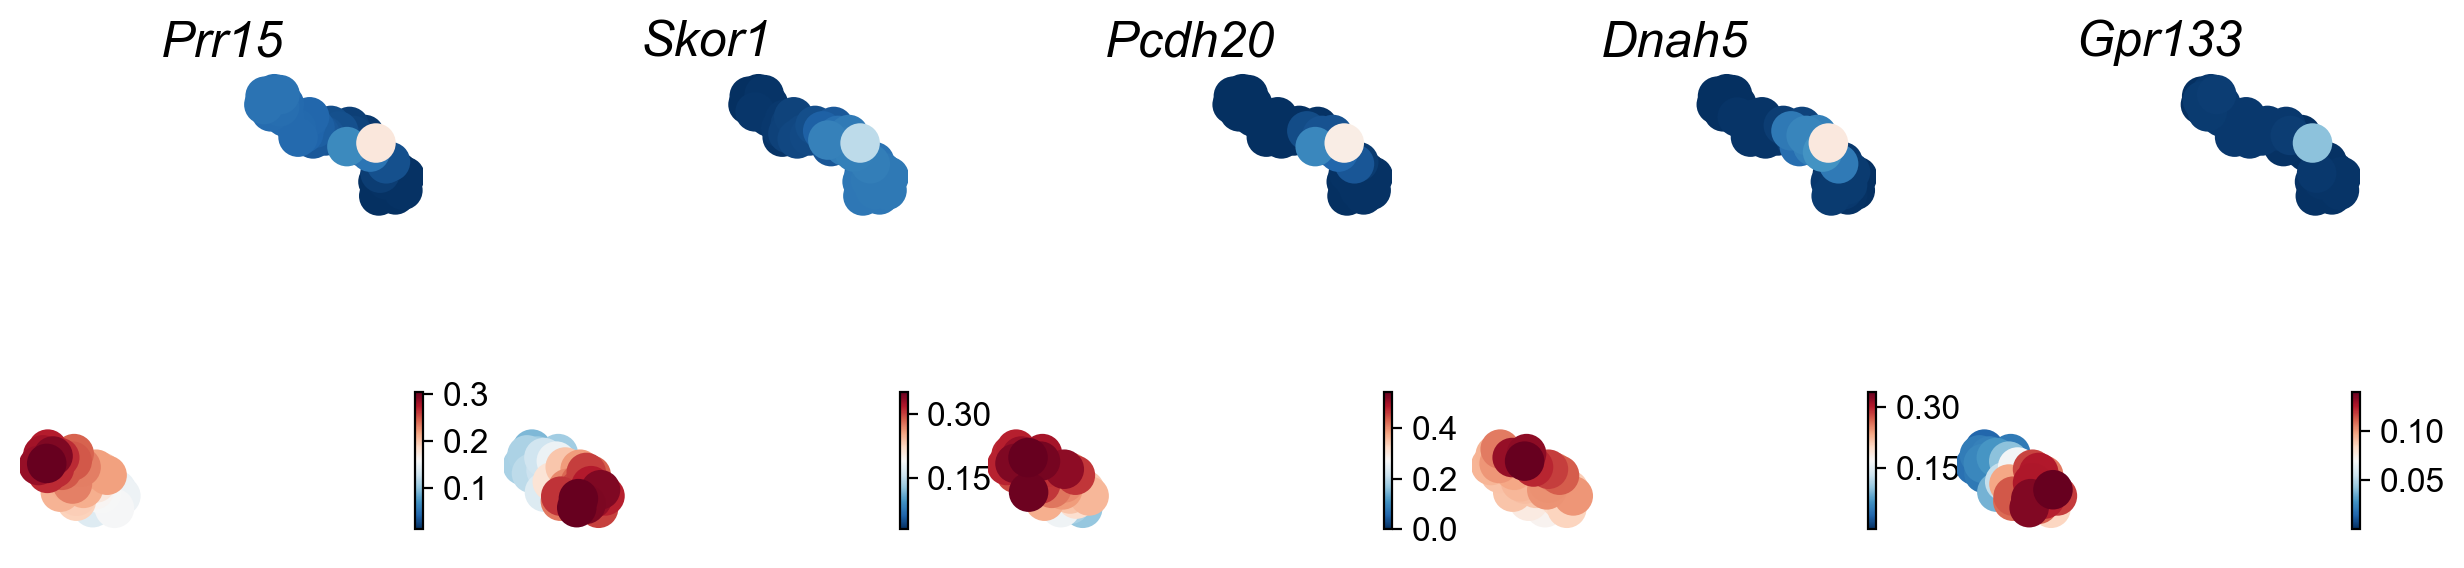

In [16]:
axs=scv.pl.umap(adata,color=Vestibular,smooth=True,show=False)
for ax in axs:
    ax.set_title(ax.get_title(),style="italic",fontsize=18)
plt.savefig("figures/vestibular.pdf",dpi=300)

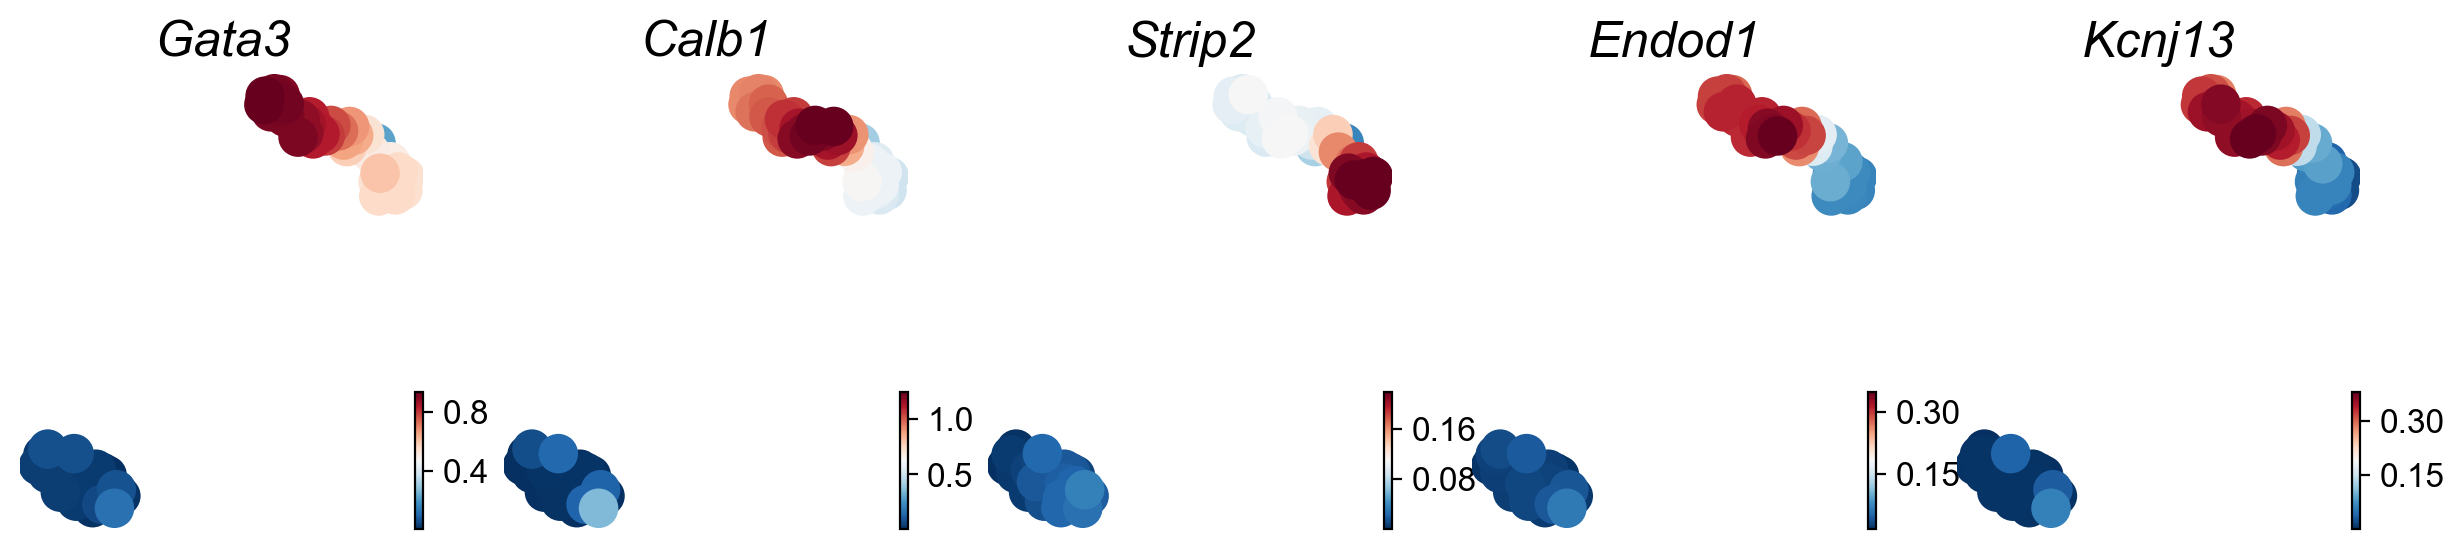

In [17]:
axs=scv.pl.umap(adata,color=Cochlear,smooth=True,show=False)
for ax in axs:
    ax.set_title(ax.get_title(),style="italic",fontsize=18)
plt.savefig("figures/cochlear.pdf",dpi=300)

In [18]:
sc.tl.score_genes(adata,Vestibular,score_name="vestibular")
sc.tl.score_genes(adata,Cochlear,score_name="cochlear")

In [19]:
adata.obs["assigned"]="non assigned"
adata.obs.loc[(adata.obs.vestibular>adata.obs.cochlear),"assigned"]="vestibular"
adata.obs.loc[(adata.obs.cochlear>adata.obs.vestibular),"assigned"]="cochlear"

In [20]:
adata_all.obs["sel"]=(adata_all.obs.leiden=="18").astype(str)

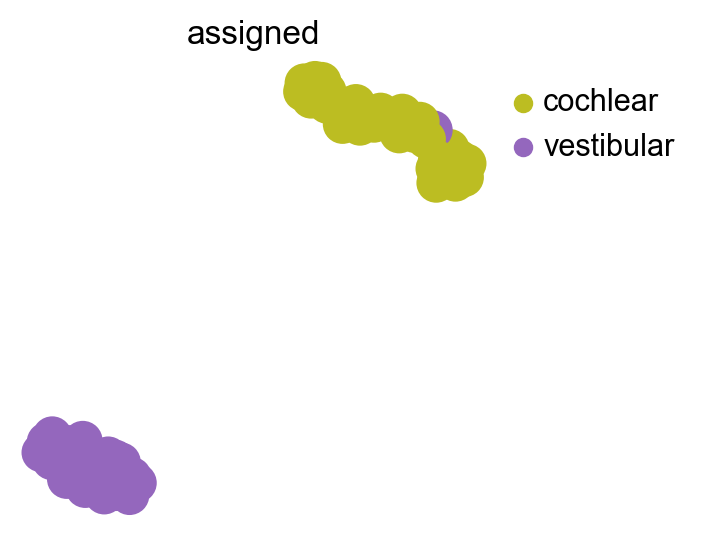

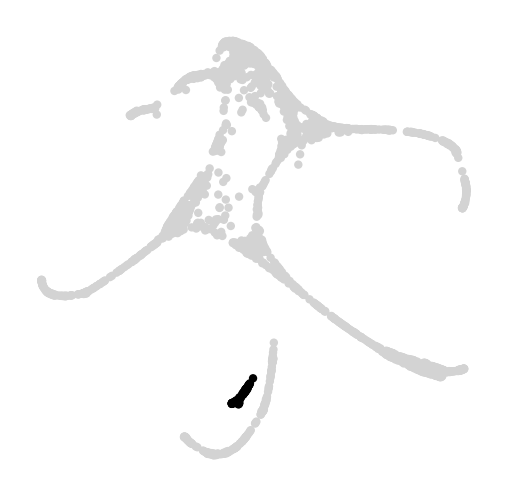

In [21]:
scv.pl.umap(adata,color="assigned",palette=["tab:olive","tab:purple"])
scv.pl.draw_graph(adata_all,color="sel",palette=["lightgrey","k"],frameon=False,legend_loc="none",title="")

In [22]:
adata_allHC=adata.copy()

In [23]:
adata_allHC.obs.assigned.value_counts()

cochlear      42
vestibular    33
Name: assigned, dtype: int64

In [24]:
adata=adata[adata.obs.assigned=="cochlear"]
adata=adata[adata.obs.devtime=="E18.5"]

In [25]:
adata

View of AnnData object with n_obs × n_vars = 39 × 16183
    obs: 'batch', 'plate', 'devtime', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'leiden', 'vestibular', 'cochlear', 'assigned'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'devtime_colors', 'doublets_colors', 'draw_graph', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'tsne', 'umap', 'assigned_colors'
    obsm: 'X_draw_graph_fa', 'X_msdiff', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'palantir_imp', 'scaled'
    obsp: 'T', 'connectivities', 'distances'

In [26]:
del adata.uns
adata.obs.n_genes_by_counts=adata.obs.n_genes_by_counts.astype(int)

Finding overdispersed features
    computing mean and variances
    gam fitting
    found 421 over-dispersed features (0:00:00) --> added 
    .var['res'], residuals of GAM fit.
    .var['lp'], p-value.
    .var['lpa'], BH adjusted p-value.
    .var['qv'], percentile of qui-squared distribution.
    .var['highly_variable'], feature is over-dispersed.



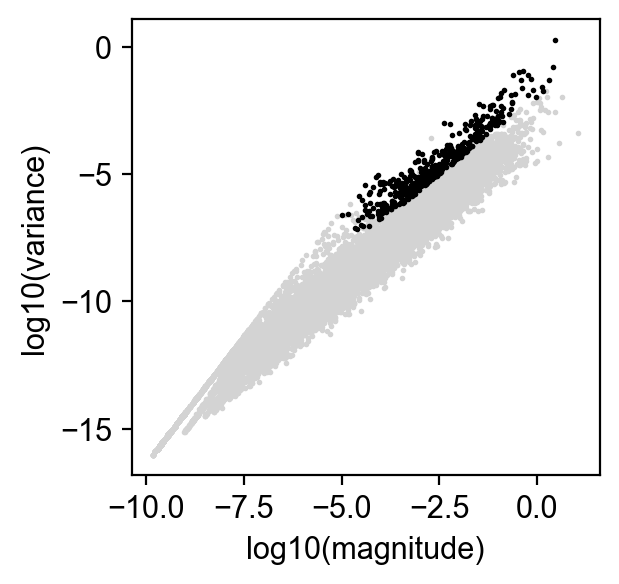

In [27]:
sc.pp.filter_genes(adata,min_cells=1)
scf.pp.find_overdispersed(adata,plot=True)
adata.layers["scaled"]=sc.pp.scale(adata.X,max_value=10,copy=True)
adata.obsm["X_pca"]=sc.pp.pca(adata[:,adata.var.highly_variable].layers["scaled"])
sc.pp.neighbors(adata,n_neighbors=15,n_pcs=10)

In [28]:
sc.tl.umap(adata,min_dist=.1,spread=2)

In [29]:
sc.tl.leiden(adata,resolution=.5)

In [30]:
adata.X=np.expm1(adata.X)
sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata,base=10)

In [31]:
adata.uns["devtime_colors"]=devtime_col

In [32]:
adata

AnnData object with n_obs × n_vars = 39 × 15317
    obs: 'batch', 'plate', 'devtime', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'leiden', 'vestibular', 'cochlear', 'assigned'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'neighbors', 'umap', 'leiden', 'log1p', 'devtime_colors'
    obsm: 'X_draw_graph_fa', 'X_msdiff', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'palantir_imp', 'scaled'
    obsp: 'T', 'connectivities', 'distances'

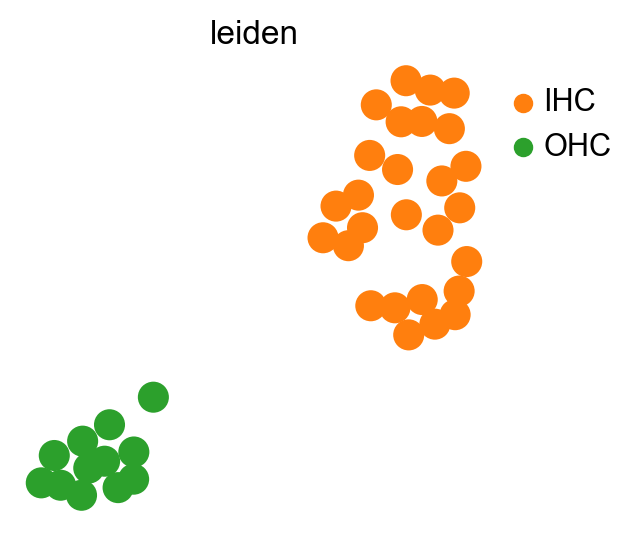

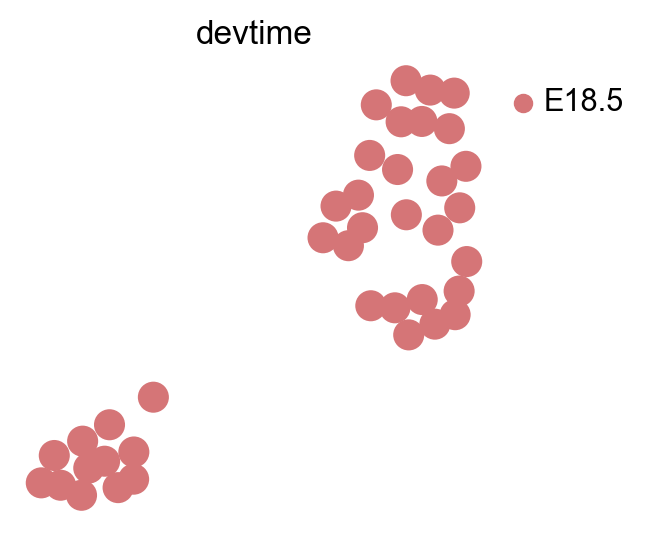

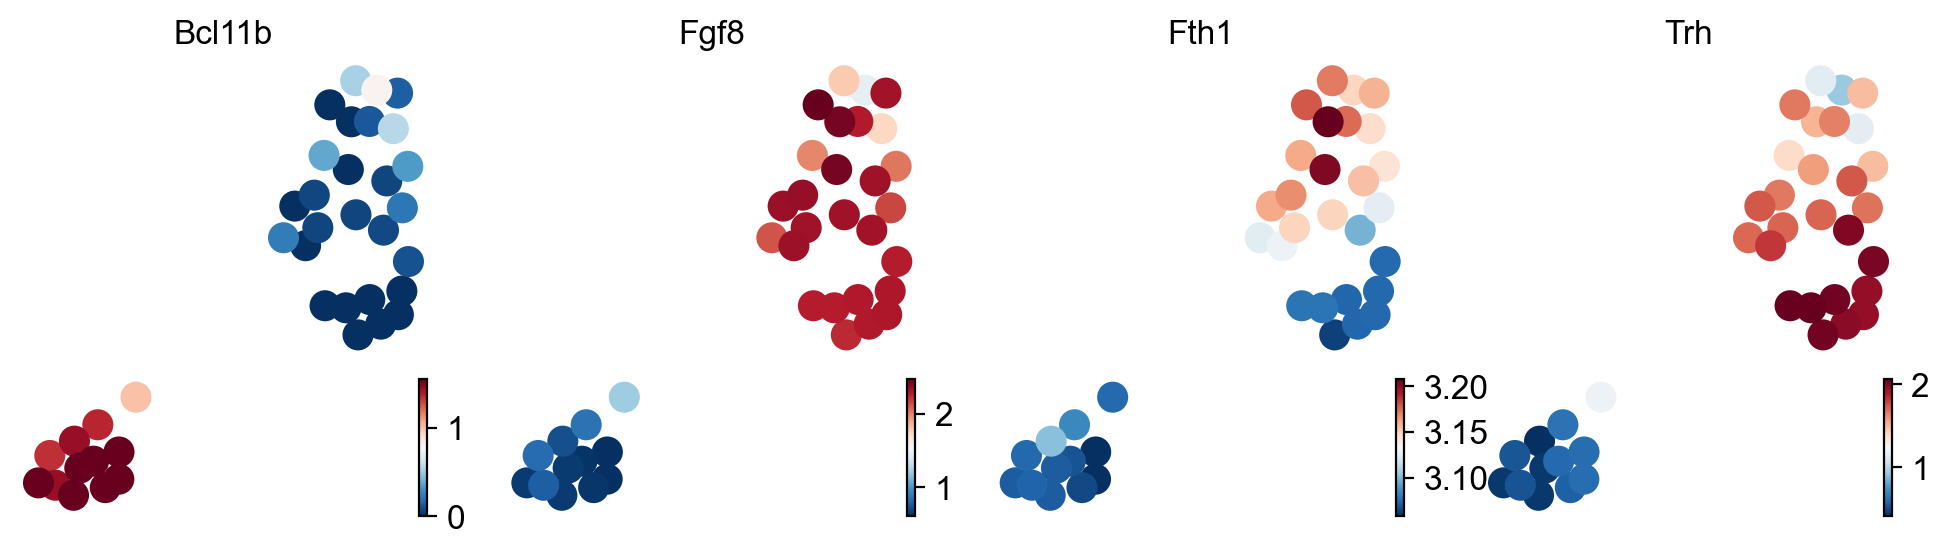

In [33]:
scv.set_figure_params(figsize=(3,3))
adata.obs.leiden=adata.obs.leiden.replace(["0","1"],["IHC","OHC"])
scv.pl.umap(adata,color="leiden",s=500,palette=["tab:orange","tab:green"])
scv.pl.umap(adata,color="devtime",s=500)
scv.pl.umap(adata, color=['Bcl11b','Fgf8','Fth1',"Trh"],smooth=True,cmap="RdBu_r",s=500)

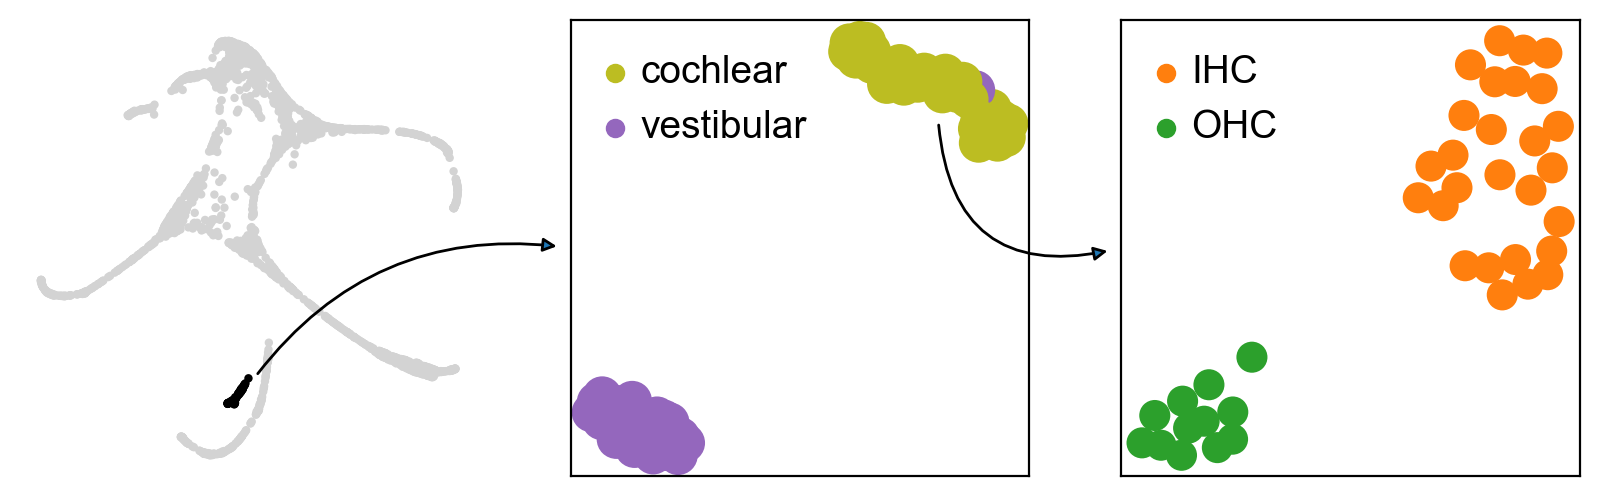

In [34]:
from matplotlib.patches import ConnectionPatch

fig,axs=plt.subplots(1,3,figsize=(10,3))
scv.pl.draw_graph(adata_all,color="sel",ax=axs[0],show=False,
                  palette=["lightgrey","k"],frameon=False,legend_loc="none",title="")
scv.pl.umap(adata_allHC,color="assigned",title="",frameon=True,ax=axs[1],legend_loc="none",show=False,palette=["tab:olive","tab:purple"])
axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].legend(frameon=False,fontsize=14)
scv.pl.umap(adata,color="leiden",title="",s=500,ax=axs[2],frameon=True,show=False,palette=["tab:orange","tab:green"])
axs[2].legend(frameon=False,fontsize=14)
axs[2].set_xlabel("")
axs[2].set_ylabel("")

con1 = ConnectionPatch(xyA=(0.5, .2), coordsA="axes fraction", connectionstyle="arc3,rad=-0.3",arrowstyle="-|>",
                       xyB=(0, .5), coordsB="axes fraction", axesA=axs[0],axesB=axs[1],shrinkA=5,shrinkB=5)
axs[0].add_artist(con1)

con1 = ConnectionPatch(xyA=(0.8, .8), coordsA="axes fraction", connectionstyle="arc3,rad=0.6",arrowstyle="-|>",
                       xyB=(0, .5), coordsB="axes fraction", axesA=axs[1],axesB=axs[2],shrinkA=5,shrinkB=5)
axs[0].add_artist(con1)
plt.savefig("figures/coclhear_HC_selection.pdf",dpi=300)

In [35]:
adata.layers["knn_smoothed"]=get_connectivities(adata, n_neighbors=None).dot(adata.X)
adata.write("data/adata_HC.h5ad")

In [36]:
anndata2pagoda.pagoda2web(adata,key_to_include=["leiden"],filename="data/p2w_hc.bin")

Converting to pagoda2 web object from anndata: layer X, X_umap embedding, ['leiden'] obs keys
    converting to SingleCellExperiment
    generating pagoda2 object
    getting Hierarchical Diff Expression Aspects
    making Gene Knn graph
    saving p2 web bin file
    done! Saved as data/p2w_hc.bin


In [37]:
anndata2pagoda.pagoda2web(adata,layer="knn_smoothed",
                          key_to_include=["leiden"],filename="data/p2w_hc_knn.bin")

Converting to pagoda2 web object from anndata: layer knn_smoothed, X_umap embedding, ['leiden'] obs keys
    converting to SingleCellExperiment
    generating pagoda2 object
    getting Hierarchical Diff Expression Aspects
    making Gene Knn graph
    saving p2 web bin file
    done! Saved as data/p2w_hc_knn.bin


In [39]:
fname="suppHC"

In [44]:
%%bash -s $fname
cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=180mm,paperwidth=210mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}

\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphbox,graphicx} 
\usepackage{adjustbox}

\begin{document}
\setmainfont{Arial}

\noindent
\large 

\fontsize{11pt}{11pt}\selectfont

\raggedright \textbf{a} Steps of selection of Cochlear Hair Cells
\includegraphics[width=\textwidth]{figures/coclhear_HC_selection.pdf}

\raggedright \textbf{b} Cochlear markers
\includegraphics[width=\textwidth]{figures/cochlear.pdf}

\raggedright \textbf{C} Vestibular markers
\includegraphics[width=\textwidth]{figures/vestibular.pdf}

\clearpage
EOF
echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg

identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./suppHC.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def))
(/usr/share/texlive/texmf-di